# Linear Regression

### Recap
A linear model makes a prediction by computing a weighted sum of the input features and a constant (bias).    
Basic linear regression model: $\hat{y}$ = $\theta$<sub>0</sub> + $\theta$<sub>1</sub>x<sub>1</sub> + $\theta$<sub>2</sub>x<sub>2</sub> + ... + $\theta$<sub>n</sub>x<sub>n</sub>    
* $\hat{y}$ is the predicted value   
* n is the number of features
* x<sub>i</sub> is the i<sup>th</sup> feature value
* $\theta$<sub>j</sub> is the j<sup>th</sup> model parameter ($\theta$<sub>0</sub> is the bias term; $\theta$<sub>1</sub> .. $\theta$<sub>n</sub> are the feature weights)   

Using linear algebra we can work with this equation in its closed form solution (also called normal equation). Recall the closed form solution for linear regression from class: w* = (X<sup>T</sup>X)<sup>-1</sup> X<sup>T</sup>y

We can think of the weights (w*) as the general parameter, $\theta$: $\hat{\theta}$ = (X<sup>T</sup>X)<sup>-1</sup> X<sup>T</sup>y

$\hat{\theta}$ is the values of $\theta$ that minimizes the cost function    
y is the target vector (i.e., labels or actual y values) 


### Part 1: Closed Form Solution

In [2]:
# Import packages
import numpy as np
import sklearn

In [3]:
# For plots
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
# Create linear-like data to test first equation
X = 2 * np.random.rand(100, 1)

# Function for generating data: y = 4 + 3x_1 + Gaussian noise
# So theta0 = 4 & theta1 = 3
y = 4 + 3 * X + np.random.randn(100, 1)

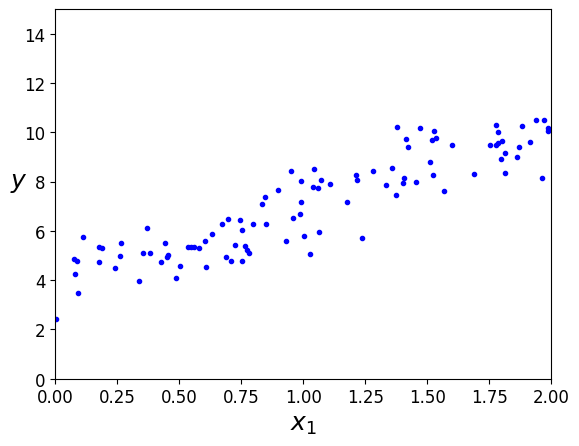

In [5]:
# Visualize dataset 
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
# Add x0 = 1 to each instance
X2 = np.c_[np.ones((100, 1)), X]

In [14]:
# Use linalg inv & dot to calculate the closed form solution with X2 & y
theta_hat = np.dot(np.dot(np.linalg.inv(np.dot(X2.T,X2)),X2.T),y)

In [15]:
# Print theta_hat
theta_hat 

array([[3.79199136],
       [3.1938111 ]])

In [45]:
# TODO: Answer in the comments
# theta_hat should print values around [4.3, 2.8]-ish
# But theta0 = 4 & theta1 = 3
# Why couldn't we recover the exact parameters of our original function?
# Your answer: Because the data is noisy so it isn't an exact linear function

In [21]:
# Task of the next 3 cells: Make a prediction using theta_hat
# Create a new dataset (what dimensions should it be?)
X_new = 2* np.random.rand(100, 1)


In [22]:
# Add x0 = 1 to each instance
X_new2 = np.c_[np.ones((100, 1)), X_new]

In [23]:
# Use your model to make a prediction on your new dataset
y_predict = np.dot(X_new2, theta_hat)

In [24]:
# Print y_predict
y_predict

array([[ 4.0613925 ],
       [ 5.99261519],
       [ 8.00626474],
       [ 9.41319755],
       [ 4.7863839 ],
       [ 6.9186336 ],
       [ 3.79366866],
       [ 4.50893977],
       [ 5.9324085 ],
       [10.06985859],
       [ 4.74813008],
       [ 5.67401671],
       [ 5.50852584],
       [ 7.39502199],
       [ 5.26643076],
       [ 7.02693145],
       [ 8.01555248],
       [ 9.97928217],
       [ 7.60897187],
       [ 4.25985496],
       [ 9.66724226],
       [ 6.84585079],
       [ 5.85784281],
       [ 5.21105564],
       [ 4.18692653],
       [ 8.97262087],
       [ 9.80243473],
       [ 7.81468333],
       [ 8.72483736],
       [10.10652677],
       [ 6.46217675],
       [ 5.227415  ],
       [ 7.97964951],
       [ 9.46976905],
       [ 5.31523884],
       [ 5.74532714],
       [ 4.76982065],
       [ 7.13305529],
       [ 8.50845008],
       [ 7.78953613],
       [ 7.22618786],
       [ 5.32179053],
       [ 5.3503831 ],
       [ 4.04665159],
       [ 6.87188379],
       [ 4

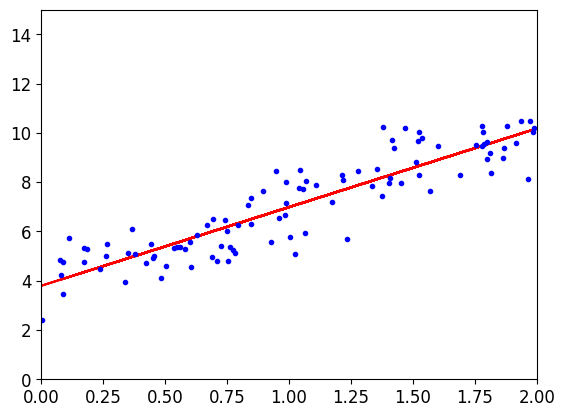

In [25]:
# Plot your new model's predictions
# You should see a red line falling mostly in the middle of the blue data points
plt.plot(X_new, y_predict, "r-")

# Plots the original data
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show( )

### Part 2: Using Scikit-Learn
Scikit-Learn's LinearRegression class is based on scipy.linalg.lstsq() (Least Squares). 

In [28]:
# Import the LinearRegression class
from sklearn.linear_model import LinearRegression

In [29]:
# Create a LinearRegression instance
lin_reg = LinearRegression()

In [30]:
# Fit your model
# NOTE: there is a bug in Windows for this method
# If you get this error: ValueError: illegal value in 4th argument of internal None
# Go to the previous cell and create your class instance with the argument: normalize = True
lin_reg.fit(X, y)

LinearRegression()

In [31]:
# Print the intercept of your model
lin_reg.intercept_

array([3.79199136])

In [32]:
# Print the estimated coefficients of your model
lin_reg.coef_

array([[3.1938111]])

In [34]:
# Use your model to make a prediction on X_new
# Are your results similar to y_predict?


new_preds = lin_reg.predict(X_new)

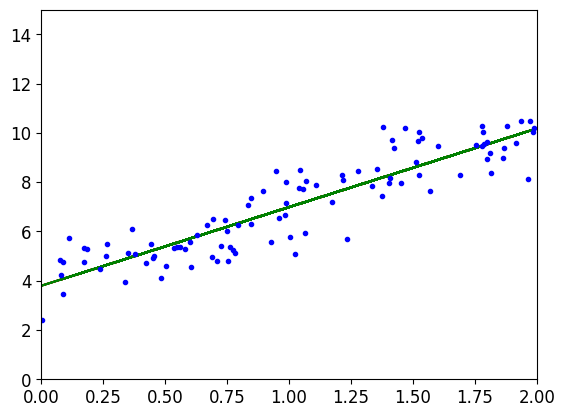

In [37]:
##### The result are almost identical
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X_new, new_preds, "g-", label="New Predictions")

# Plots the original data
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show( )

### Part3: Stochastic Gradient Descent

In [38]:
# Import the SGDRegressor class
from sklearn.linear_model import SGDRegressor

In [62]:
# Create an SGDRegressor with
# Maximum number of iterations = 1000
# Training stopping criterion of 1e-3 
# Ridge regularization term
# Initial learning rate of 0.001
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty="l2", eta0=0.001)

In [63]:
# Fit the model 
sgd_reg.fit(X, y.ravel()) # y needs to be a 1d array

SGDRegressor(eta0=0.001)

In [64]:
# Print the intercept
sgd_reg.intercept_


array([3.19102324])

In [65]:
# Print the estimated coefficients
sgd_reg.coef_

array([3.53451903])

The intercept and coefficient should be close to the values of $\hat{\theta}$ found by the closed form solution in Part 1. If they're not, you can change the regularization and learning rate until you find values that work better. 